### 逻辑回归
- 在之前的课程中我们已经学习接触过相关的回归模型了，我们知道回归模型是用来处理和预测连续型标签的算法。然而逻辑回归，是一种名为“回归”的线性分类器，其本质是由线性回归变化而来的，一种广泛使用于分类问题中的广义回归算法。要理解逻辑回归从何而来，得要先理解线性回归。线性回归是机器学习中最简单的的回归算法，它写作一个几乎人人熟悉的方程（为了更好理解本节后面的讲解到的sigmod函数，下面的回归函数用z来表示）:image.png

- 其中$𝛉_0$被称为截距(intercept)， $𝛉_1~𝛉_n$ 被称为系数(coefficient)，这个表达式，其实就和我们小学时就无比熟悉的y=ax+b是同样的性质。我们可以使用矩阵来表示这个方程，其中x和𝛉都可以被看做是一个列矩阵，则有：
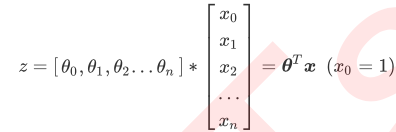
- 通过函数z，线性回归使用输入的特征矩阵X来输出一组连续型的标签值y_pred，以完成各种预测连续型变量的任务 (比如预测产品销量，预测股价等等)。

- 那如果我们的标签是离散型变量，尤其是，如果是满足0-1分布的离散型变量，我们要怎么办呢？
  - 使用逻辑回归这个回归模型
  <br><br>
- 问题：回归模型可以实现分类效果吗？
  - 可以。使用sigmod函数。
#### Sigmod函数
- 我们可以通过引入sigmod函数，将线性回归方程z变换为g(z)，并且将g(z)的值分布在(0,1)之间，且当g(z)接近0时样本的标签为类别0，当g(z)接近1时样本的标签为类别1，这样就得到了一个分类模型。
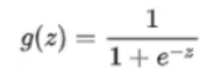
e：e是自然对数的底数，是一个无限不循环小数，其值是2.71828...
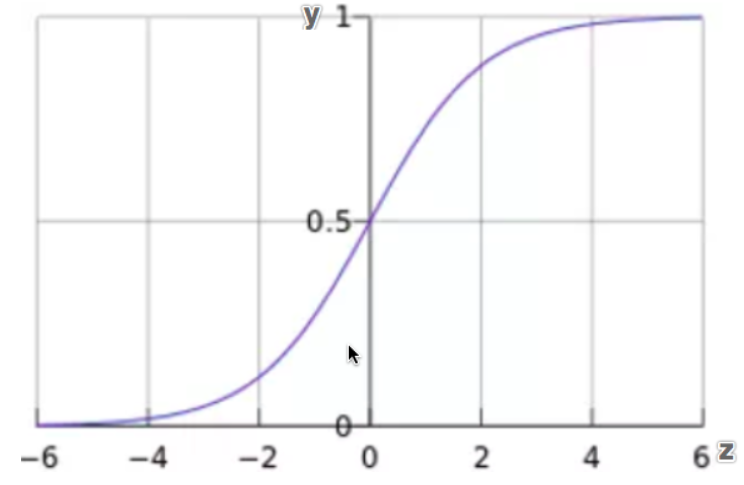
- 函数解释：
- Sigmoid函数是一个S型的函数，当自变量z趋近正无穷时，因变量g(z)趋近于1，而当z趋近负无穷时，g(z)趋近于0，它能够将任何实数（非0和1的标签数据）映射到(0,1)区间，使其可用于将任意值函数转换为更适合二分类的函数。 因为这个性质，Sigmoid函数也被当作是归一化的一种方法，与我们之前学过的MinMaxSclaer同理，是属于数据预处理中的“缩放”功能，可以将数据压缩到[0,1]之内。区别在于，MinMaxScaler归一化之后，是可以取到0和1的(最大值归一化后就是1，最小值归一化后就是0)，但Sigmoid函数只是无限趋近于0和1。



### 逻辑回归和线性回归之间的关联
- 线性回归中 z=𝛉Tx，于是我们将z带入，就得到了二元逻辑回归模型的一般形式:
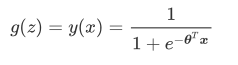
- y(x)就是我们逻辑回归返回的标签值。此时y(x)的取值都在[0,1]之间，因此y(x)和1-y(x)相加必然为1。如果我们令y(x)除以1-y(x)可以得到形似几率的y(x)/1-y(x)，在此基础上取对数，可以很容易就得到:
  - ln解释：ln就是指log以e为底的对数，b=ln(a)表示e的b次方等于a。e=2.71828……
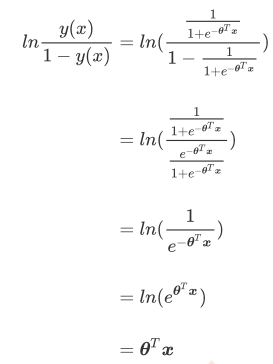
- 不难发现，y(x)逻辑回归的形似几率取对数的本质其实就是我们的线性回归z，我们实际上是在对线性回归模型的预测结果取对数几率来让其的结果无限逼近0和1。因此，其对应的模型被称为”对数几率回归“(logistic Regression)，也就 是我们的逻辑回归，这个名为“回归”却是用来做分类工作的分类器。
  - 逻辑回归的形似几率取对数就是线性回归
  - 线性回归解的对数几率就是逻辑回归
#### 因此逻辑回归是由线性回归变化而来的
- 线性回归的核心任务是通过求解θ构建z这个预测函数，并希望预测函数z能够尽量拟合数据，因此逻辑回归的核心任务也是类似的:求解θ来构建一个能够尽量拟合数据的预测函数z，并通过向预测函数中输入特征矩阵来获取相应的标签值y。
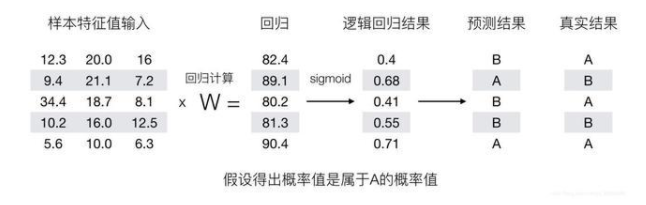
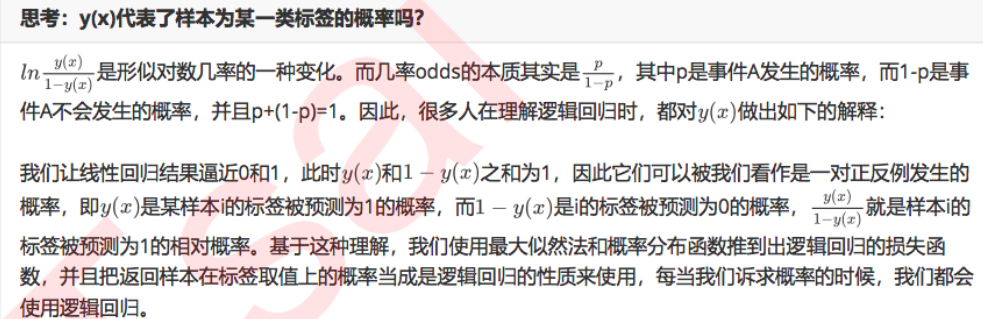

#### 逻辑回归的优点
- 首先必须要声明的一点就是逻辑回归是一个受工业商业热爱，使用广泛的模型。
  - 1.逻辑回归对线性关系（特征与标签之间的线性关系极强的数据）的拟合效果好到丧心病狂，比如金融领域中的信用卡欺诈，评分卡制作，电商中的营销预测等等相关的数据，都是逻辑回归的强项。相对，逻辑回归在非线性数据中的效果有时候比瞎猜还不如，如果你事先知道你的数据之间的联系是非线性的，千万一定不要使用逻辑回归！！！
    - 其实最简单判别一个模型是否为线性的，只需要判别决策边界是否是直线，也就是是否能用一条直线来划分
  - 2.逻辑回归计算快:对于线性数据，逻辑回归的拟合和计算都非常快，计算效率优于SVM和随机森林，亲测表示在大型数据上尤其能看出区别。
  - 3.逻辑回归返回的分类结果不是固定的0，1，而是以小数形式呈现的类概率数字:我们因此可以把逻辑回归返回的结果当成连续型数据来利用。比如在评分卡制作时，我们不仅需要判断客户是否会违约，还需要给出确定的”信用分“，而这个信用分的计算就需要使用类概率计算出的对数几率（概率）， 。
- 总结：由此，我们已经了解了逻辑回归的本质，它是一个返回对数几率的在线性数据上表现优异的分类器，它主要被应用在金融领域。注意，虽然我们熟悉的逻辑回归通常被用于处理二分类问题，但逻辑回归也可以做多分类。

#### 逻辑回归的损失函数
- 在逻辑回归分类的时候，不管原始样本中的类别使用怎样的值或者文字表示，逻辑回归统一将其视为0类别和1类别。
- 因为逻辑回归也采用了寻找特征和目标之间的某种关系，则每个特征也是有权重的就是w，那么也会存在真实值和预测值之间的误差（损失函数），那么逻辑回归的损失函数和线性回归的损失函数是否一样呢？
- 由于逻辑回归是用于分类的，因此该损失函数和线性回归的损失函数是不一样的！逻辑回归采用的损失函数是：对数似然损失函数：
- 注意：没有求解参数需求的模型是没有损失函数的，比如KNN，决策树。
- 损失函数被写作如下：
- 为什么使用-log函数为损失函数，损失函数的本质就是，如果我们预测对了，则没有损失，反之则损失需要变的很大，而-log函数在【0，1】之间正好符合这一点。
-log(h)表示分类到正例1的损失
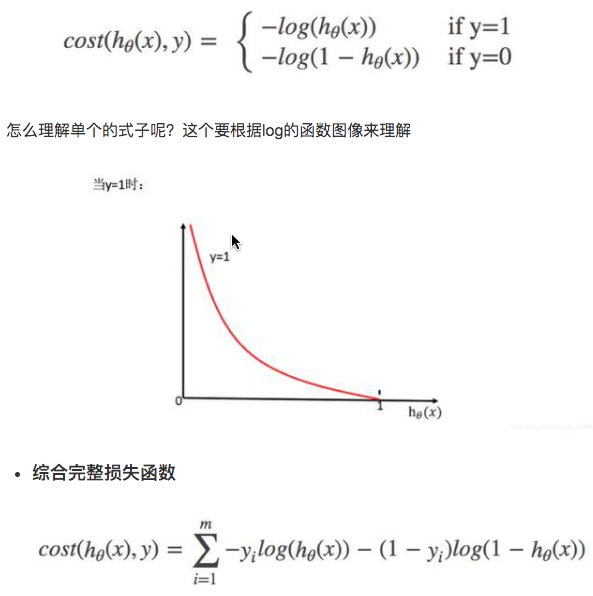
- 损失函数表征预测值与真实值之间的差异程度，如果预测值与真实值越接近则损失函数应该越小
 
- 损失函数解释
- yilog(h)表示分类到真实标签的正例的损失，根据-log函数得知如果分类正确则损失值小，反之损失大
- -(1-yi)log(1-h)表示分类到真实标签反例的损失，根据-log函数得知如果分类正确则损失小，反之损失大
- 那么两者相加就获得了逻辑回归模型总分类结果的损失!
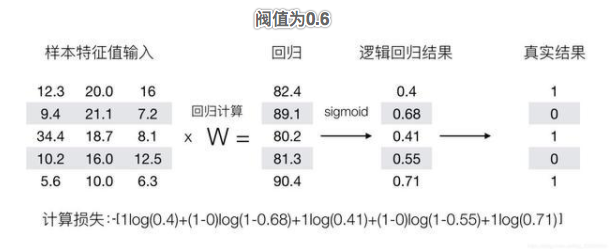
- 将逻辑回归对应的预测结果带入损失函数：

### 梯度下降
- 逻辑回归的数学目的是求解能够让模型最优化，拟合程度最好的参数𝛉的值，即求解能够让损失函数J(𝛉)最小化的𝛉值。
 
- 梯度下降原理介绍：
  - 假设现在有一个带两个特征并且没有截距的逻辑回归y(x1,x2)，两个特征所对应的参数分别为[𝛉1,𝛉2]。下面这个华丽的平面就是我们的损失函数 J(𝛉1,𝛉2)在以𝛉1,𝛉2和J为坐标轴的三维立体坐标系上的图像。现在，我们寻求的是损失函数的最小值,也就是图像的最低点。
 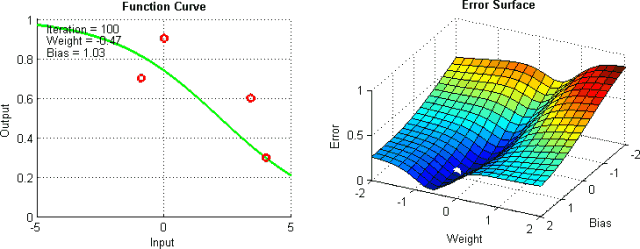


 - 那我们怎么做呢?我在这个图像上随机放一个小球，当我松手，这个小球就会顺着这个华丽的平面滚落，直到滚到 深蓝色的区域——损失函数的最低点。为了严格监控这个小球的行为，我让小球每次滚动的距离有限，不让他一次 性滚到最低点，并且最多只允许它滚动100步，还要记下它每次滚动的方向，直到它滚到图像上的最低点。
- 可以看见，小球从高处滑落，在深蓝色的区域中来回震荡，最终停留在了图像凹陷处的某个点上。非常明显，我们可以观察到几个现象:
  - 首先，小球并不是一开始就直向着最低点去的，它先一口气冲到了蓝色区域边缘，后来又折回来，我们已经规定了小球是多次滚动，所以可见，小球每次滚动的方向都是不同的。
  - 另外，小球在进入深蓝色区域后，并没有直接找到某个点，而是在深蓝色区域中来回震荡了数次才停下。这有两种可能:
    - 1) 小球已经滚到了图像的最低点，所以停下了，
    - 2) 由于我设定的步数限制，小球还没有找到最低点，但也只 好在100步的时候停下了。也就是说，小球不一定滚到了图像的最低处。
  - 但无论如何，小球停下的就是我们在现有状况下可以获得的唯一点了。如果我们够幸运，这个点就是图像的最低点，那我们只要找到这个点的对应坐标(𝛉1，𝛉2，J)，就可以获取能够让损失函数最小的参数取值[𝛉1,𝛉2]了。如此，梯度下降的过程就已经完成。
- 在这个过程中，小球其实就是一组组的坐标点(𝛉1，𝛉2，J);小球每次滚动的方向就是那一个坐标点的梯度向量的方 向，因为每滚动一步，小球所在的位置都发生变化，坐标点和坐标点对应的梯度向量都发生了变化，所以每次滚动 的方向也都不一样;人为设置的100次滚动限制，就是sklearn中逻辑回归的参数max_iter，代表着能走的最大步数.
- 所以梯度下降，其实就是在众多[𝛉1,𝛉2]可能的值中遍历，一次次求解坐标点的梯度向量,不断让损失函数的取值J逐渐逼近最小值，再返回这个最小值对应的参数取值[𝛉1,𝛉2]的过程。
  <br><br>



#### 正则化
- 注意：
  - 由于我们追求损失函数的最小值，让模型在训练集上表现最优，可能会引发另一个问题:如果模型在训练集上表示优秀，却在测试集上表现糟糕，模型就会过拟合。所以我们还是需要使用控制过拟合的技术来帮助我们调整模型，对逻辑回归中过拟合的控制，通过正则化来实现。
- 正则化是用来防止模型过拟合的过程，常用的有L1正则化和L2正则化两种选项，分别通过在损失函数后加上参数向量𝛉的L1范式和L2范式的倍数来实现。这个增加的范式，被称为“正则项”，也被称为"惩罚项"。
  <br><br>
- L1范式
  - L1范式表现为参数向量𝛉中的每个参数的绝对值之和
  $$J(\theta)_{L1} = J\theta)+\frac{1}{C}\sum_{j=1}^n\vert{\theta_j}\vert(j\geq 1)$$
    -（j>=1是因为截距不需要参与运算 下同理）
 
- L2范式
  - L2范数表现为参数向量𝛉中的每个参数的平方和的开方值  
            $$J(\theta)_{L2} = J(\theta)+\frac{1}{C}\sqrt{\sum_{j=1}^n(\theta_j)^2}(j\geq 1)$$
 
- 其中J(𝛉)是我们之前提过的损失函数，C是用来控制正则化程度的超参数，n是方程中特征的总数，也是方程中参数的总数，j代表每个𝛉参数(w系数)。在这里，j要大于等于1，是因为我们的参数向量中，第一个参数是𝛉0，是我们的截距它通常是不参与正则化的。
 
- 总结：
我们知道损失函数的损失值越小（在训练集中预测值和真实值越接近）则逻辑回归模型就越有可能发生过拟合（模型只在训练集中表现的好，在测试集表现的不好）的现象。通过正则化的L1和L2范式可以加入惩罚项C来矫正模型的拟合度。因为C越小则损失函数会越大表示正则化的效力越强，参数𝛉会被逐渐压缩的越来越小。
注意：L1正则化会将参数w压缩为0，L2正则化只会让参数尽量小，不会取到0。原因解释会涉及到坐标下降法和求导相关，故作不解释，只需要记住结论即可
通过L1、L2范式 来压缩权重系数 进而解决过拟合的问题。
 
L1和L2范式的区别
在L1正则化在逐渐加强的过程中，携带信息量小的、对模型贡献不大的特征的参数w，会比携带大量信息的、对模型有巨大贡献的特征的参数更快地变成0，所以L1正则化本质是一个特征选择的过程。L1正则化越强，参数向量中就越多的参数为0，选出来的特征就越少，以此来防止过拟合。因此，如果特征量很大，数据维度很高，我们会倾向于使用L1正则化。
L2正则化在加强的过程中，会尽量让每个特征对模型都有一些小的贡献，但携带信息少，对模型贡献不大的特征的参数w会非常接近于0。通常来说，如果我们的主要目的只是为了防止过拟合，选择L2正则化就足够了。但是如果选择L2正则化后还是过拟合，模型在未知数据集上的效果表现很差，就可以考虑L1正则化。
 
建立两个逻辑回归，L1正则化和L2正则化的差别就一目了然了:

 

In [15]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split

#加载样本数据
data = load_breast_cancer()
X = data.data
y = data.target
#建立两种模型
lrl1 = LR(penalty="l2",C=0.5)
lrl2 = LR(penalty="l2",C=0.5)
#逻辑回归的重要属性coef_，查看每个特征所对应的参数 
lrl1.fit(X,y)
print('L1范式：',lrl1.coef_)

lrl2 = lrl2.fit(X,y)
print('L2范式：',lrl2.coef_)


L1范式： [[ 0.88787468  0.41592499  0.30795125 -0.01689198 -0.03253717 -0.15409013
  -0.21578266 -0.09081443 -0.04513882 -0.0089909   0.0392201   0.3489661
   0.12934285 -0.10655331 -0.00295986 -0.03311872 -0.04609007 -0.01181374
  -0.0108834  -0.00305108  0.94364829 -0.47684015 -0.25223103 -0.01370225
  -0.05928515 -0.4810105  -0.59830311 -0.17502436 -0.14338131 -0.04604889]]
L2范式： [[ 0.88787468  0.41592499  0.30795125 -0.01689198 -0.03253717 -0.15409013
  -0.21578266 -0.09081443 -0.04513882 -0.0089909   0.0392201   0.3489661
   0.12934285 -0.10655331 -0.00295986 -0.03311872 -0.04609007 -0.01181374
  -0.0108834  -0.00305108  0.94364829 -0.47684015 -0.25223103 -0.01370225
  -0.05928515 -0.4810105  -0.59830311 -0.17502436 -0.14338131 -0.04604889]]


C:\application\anoconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\application\anoconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

#### 逻辑回归API
- from sklearn.linear_model import LogisticRegression
- 超参数介绍：
  - penalty：
    - 可以输入l1或者l2来指定使用哪一种正则化方式。不填写默认"l2"。 注意，若选择"l1"正则化，参数solver仅能够使用求解方式”liblinear"和"saga“，若使用“l2”正则 化，参数solver中所有的求解方式都可以使用。
  - C：
    - 惩罚项。必须是一个大于0的浮点数，不填写默认1.0，即默认正则项与损失函数的比值是1:1。C越小，损失函数会越大，模型对损失函数的惩罚越重，正则化的效力越强，参数会逐渐被压缩得越来越小。
  - max_iter:
    - 梯度下降中能走的最大步数，默认值为100.步数的不同取值可以帮助我们获取不同的损失函数的损失值。目前没有好的办法可以计算出最优的max_iter的值，一般是通过绘制学习曲线对其进行取值。
  - solver：
    - 我们之前提到的梯度下降法，只是求解逻辑回归参数𝛉的一种方法。sklearn为我们提供了多种选择，让我们可以使用不同的求解器来计算逻辑回归。求解器的选择，由参数"solver"控制，共有五种选择。
      - liblinear：是二分类专用（梯度下降），也是现在的默认求解器。
      - lbfgs,newton-cg,sag,saga:是多分类专用，几乎不用。
  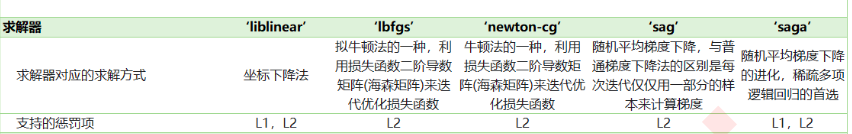
  - multi_class：
    - 输入"ovr", "multinomial", "auto"来告知模型，我们要处理的分类问题的类型。默认是"ovr"。
      - 'ovr':表示分类问题是二分类，或让模型使用"一对多"的形式来处理多分类问题。
      - 'multinomial':表示处理多分类问题，这种输入在参数solver是'liblinear'时不可用。
      - "auto":表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型。比如说，如果数据是二分 类，或者solver的取值为"liblinear"，"auto"会默认选择"ovr"。反之，则会选择"multinomial"。
  - class_weight:
    - 表示样本不平衡处理的参数。样本不平衡指的是在一组数据中，某一类标签天生占有很大的比例，或误分类的代价很高，即我们想要捕捉出某种特定的分类的时候的状况。什么情况下误分类的代价很高?
    - 例如，我们现在要对潜在犯罪者和普通人进行分类，如果没有能够识别出潜在犯罪者，那么这些人就可能去危害社会，造成犯罪，识别失败的代价会非常高，但如果，我们将普通人错误地识别成了潜在犯罪者，代价却相对较小。所以我们宁愿将普通人分类为潜在犯罪者后再人工甄别，但是却不愿将潜在犯罪者 分类为普通人，有种"宁愿错杀不能放过"的感觉。
    - 再比如说，在银行要判断“一个新客户是否会违约”，通常不违约的人vs违约的人会是99:1的比例，真正违约的人其实是非常少的。这种分类状况下，即便模型什么也不做，全把所有人都当成不会违约的人，正确率也能有99%， 这使得模型评估指标变得毫无意义，根本无法达到我们的“要识别出会违约的人”的建模目的。
  - None：
    - 因此我们要使用参数class_weight对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类， 向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重，即自动1: 1。
  - balanced：
     - 当误分类的代价很高的时候，我们使用”balanced“模式，可以解决样本不均衡问题。
 <br><br>
- 乳腺癌数据集下，max_iter的学习曲线

In [16]:
%matpotlib inline

UsageError: Line magic function `%matpotlib` not found.


In [17]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split

#加载样本数据
data = load_breast_cancer()
X = data.data
y = data.target

C:\application\anoconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\application\anoconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\application\anoconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


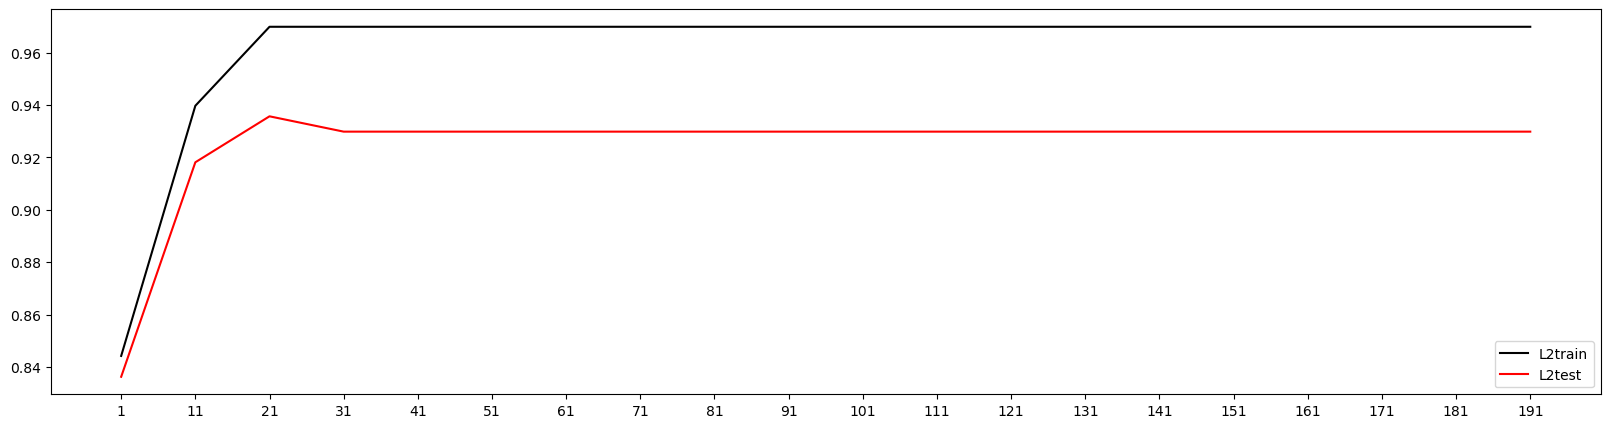

In [29]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
l2 = []
l2_test = []
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver='liblinear',C=0.9,max_iter=i)
    lrl2.fit(x_train,y_train)
    
    l2.append(accuracy_score(lrl2.predict(x_train),y_train))
    l2_test.append(accuracy_score(lrl2.predict(x_test),y_test))
graph = [l2,l2_test]
color = ['black','red']
label = ['L2train','L2test']
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()